In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")


from sqlalchemy import create_engine

# Replace with your actual credentials
username = 'root'
password = 'YourPassword!'
host = 'localhost'
port = '3306'
database = 'banking_db'

# Create the connection string
connection_string = f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}'

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# Example: Read the 'accounts' table into a DataFrame
df = pd.read_sql('SELECT * FROM banking', con=engine)

df.head()

,﻿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ﻿Client ID                3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [3]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [4]:
df.isnull().sum()

Client ID                  0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### 4. Risk Analysis:

-   A. Risk Weighting Distribution:

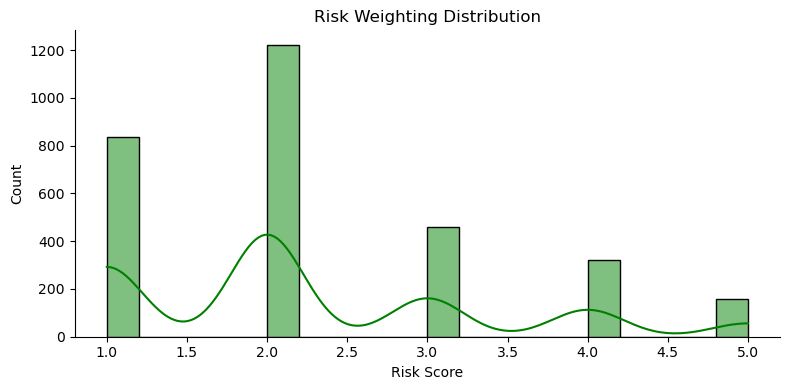

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(
    df['Risk Weighting'],
    bins=20, 
    kde=True, 
    color='green'
    )

plt.title('Risk Weighting Distribution')
plt.xlabel('Risk Score')
plt.ylabel('Count')

sns.despine()
plt.tight_layout()
plt.show()

-   #### Observations:
    1. **Risk Score Range**:
    - The plot shows the distribution of risk scores, ranging from approximately **1.0 to 5.0**.
    - Each bar represents the count of observations for a specific risk score.

    2. **Distribution Shape**:
    - The distribution is **unimodal**, with a single prominent peak.
    - The peak occurs around a **risk score of 2.0**, where the count reaches its maximum value (approximately **1200**).

    3. **Count Trends**:
    - **Low Risk Scores (1.0–1.5)**:
        - The count starts relatively high near **1.0** (around **800**) and decreases as the risk score increases toward **1.5**.
    - **Peak at Risk Score 2.0**:
        - The count rises sharply to a peak of approximately **1200** at a risk score of **2.0**.
    - **Decline After Peak**:
        - The count decreases gradually as the risk score increases beyond **2.0**.
        - At **3.0**, there is a secondary smaller peak with a count of around **400**.
        - Further increases in risk score result in lower counts, with the count dropping to around **200** at **4.0** and **150** at **5.0**.

    4. **Smooth Density Curve**:
    - The green curve (likely a kernel density estimate) provides a smoothed representation of the risk score distribution.
    - This curve confirms the unimodal nature of the data and highlights the gradual decline in frequency as the risk score moves away from the peak.

    5. **Skewness**:
    - The distribution appears slightly **right-skewed**, as the tail extends further to the right (higher risk scores) compared to the left.
    - Most observations are concentrated around the lower risk scores, with fewer observations at higher risk scores.


______

-   B. Risk vs. Credit Card Balance:
    -    Higher-risk clients may have higher credit card balances...

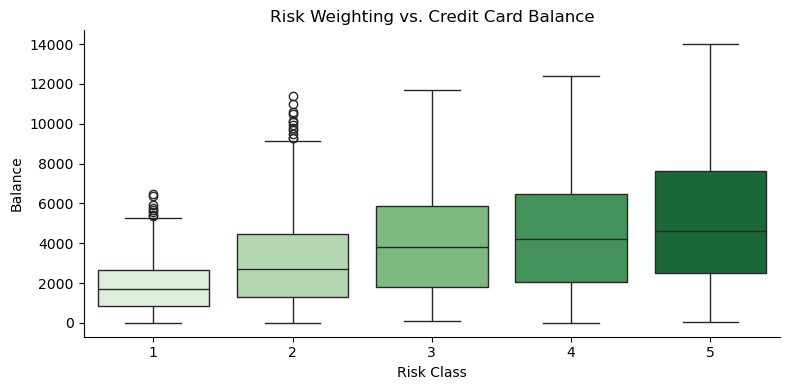

In [7]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df,
    x='Risk Weighting', 
    y='Credit Card Balance',
    palette='Greens',
    )
plt.title('Risk Weighting vs. Credit Card Balance')
plt.xlabel('Risk Class')
plt.ylabel('Balance')

sns.despine()
plt.tight_layout()
plt.show()

-   #### Observations:
    1. **Risk Classes**:
    - The plot shows the distribution of credit card balances across five risk classes: **1, 2, 3, 4, and 5**.
    - Each boxplot represents the credit card balance for a specific risk class.

    2. **Credit Card Balance Distribution**:
    - **Risk Class 1**:
        - The credit card balances are relatively low, with most values clustered around **0 to 2,000**.
        - There is minimal variability, indicating that customers in this low-risk class tend to have small or no credit card balances.

    - **Risk Class 2**:
        - The credit card balances increase compared to Risk Class 1.
        - The median balance is around **4,000**, with some outliers reaching up to **10,000**.
        - This suggests moderate credit card usage among customers in this risk class.

    - **Risk Class 3**:
        - The credit card balances continue to rise.
        - The median balance is around **6,000**, with a wider spread compared to lower risk classes.
        - Outliers extend up to **12,000**, indicating higher variability in credit card usage.

    - **Risk Class 4**:
        - The credit card balances further increase.
        - The median balance is around **7,000**, with a similar spread as Risk Class 3.
        - Outliers reach up to **14,000**, showing continued high variability.

    - **Risk Class 5**:
        - The highest risk class shows the largest credit card balances.
        - The median balance is around **8,000**, with a significant number of observations exceeding **10,000**.
        - The range is broad, with outliers extending to **14,000**, indicating high variability and potentially risky credit card usage.

    3. **Trends Across Risk Classes**:
    - As the risk class increases, the **median credit card balance** generally increases.
    - Higher risk classes (e.g., 4 and 5) exhibit greater variability in credit card balances, with more extreme outliers.
    - Lower risk classes (e.g., 1 and 2) show smaller credit card balances and less variability.

    4. **Outliers**:
    - Outliers are present in all risk classes but become more frequent and pronounced in higher risk classes (4 and 5).
    - These outliers suggest that some customers in higher risk classes have significantly higher credit card balances than others.


__________

-   C. Risk by Occupation:
    -   Certain occupations (e.g., freelancers) may be riskier than salaried professionals.

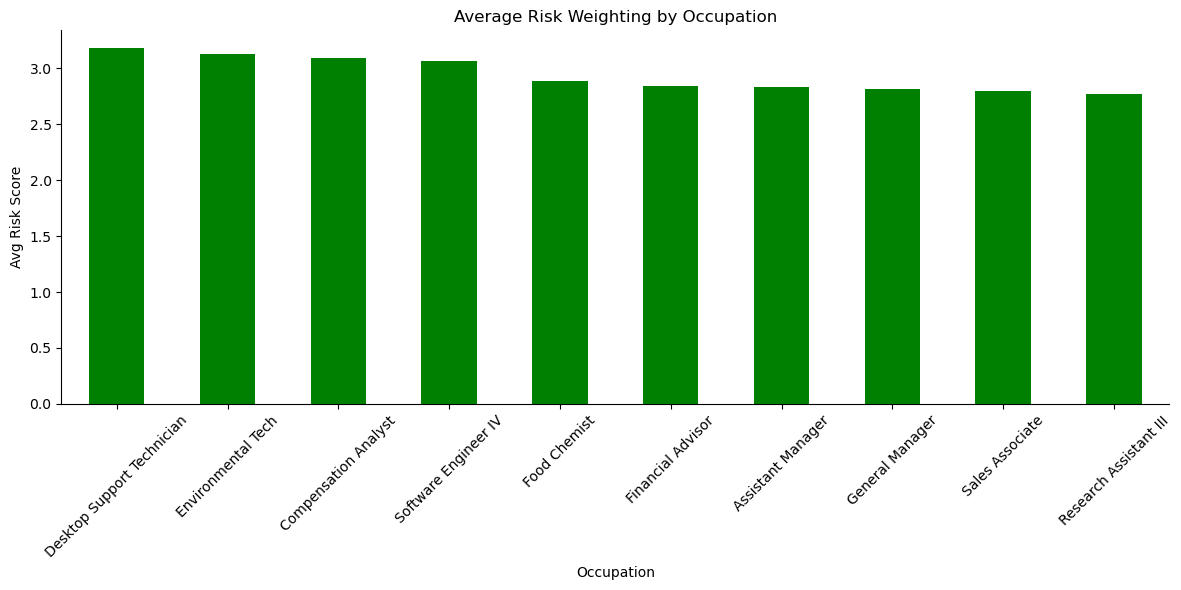

In [8]:
plt.figure(figsize=(12, 6))
df.groupby('Occupation')['Risk Weighting'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Average Risk Weighting by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Avg Risk Score')
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

-   #### Observations:
    1. **Occupations**:
    - The plot shows the average risk weighting for nine different occupations:
        - Desktop Support Technician
        - Environmental Tech
        - Compensation Analyst
        - Software Engineer IV
        - Food Chemist
        - Financial Advisor
        - Assistant Manager
        - General Manager
        - Sales Associate
        - Research Assistant III

    2. **Risk Weighting Range**:
    - The average risk weighting ranges from approximately **2.7 to 3.1**.
    - Most occupations cluster around the mid-range of risk, with slight variations.

    3. **Highest Risk Weightings**:
    - **Desktop Support Technician** and **Environmental Tech** have the highest average risk weightings, both close to **3.1**.
    - These occupations stand out as having slightly higher risk compared to others.

    4. **Lowest Risk Weightings**:
    - **Research Assistant III**, **Sales Associate**, **General Manager**, and **Assistant Manager** have the lowest average risk weightings, all around **2.7–2.8**.
    - These occupations exhibit lower risk compared to the others.

    5. **Moderate Risk Weightings**:
    - Occupations such as **Compensation Analyst**, **Software Engineer IV**, **Food Chemist**, and **Financial Advisor** fall in the middle range, with average risk weightings between **2.9 and 3.0**.
    - These occupations show moderate risk levels.

    6. **Consistency Across Occupations**:
    - The differences in average risk weightings across occupations are relatively small, indicating that most occupations have similar risk profiles.
    - There is no extreme disparity in risk between any two occupations.


__________